 
<span style="
             padding: 0px 20px;">**Exploring Regression Models for Predicting Laptop Sales Price**</span>




# Introduction:
In this notebook, I explore the performance of various regression models for predicting the sales price of laptops. The dataset contains several numerical features such as processor speed, RAM, storage capacity, etc., along with the target variable - the sales price of the laptops.

# Models Used:
I experimented with several regression models including:

Decision Tree Regression
K-Nearest Neighbors (KNN) Regression
Support Vector Machine (SVM) Regression
 
Linear Regression
Feature Selection:

I selected a subset of numerical features from the dataset to use as input for the regression models. These features include processor speed, RAM size, storage capacity, etc.

# Data Preprocessing:
Before training the models, I scaled the numerical features to ensure they have similar ranges, which is important for models like SVM and KNN that are sensitive to feature scales.

# Model Evaluation:
I evaluated the performance of each model using common regression metrics such as Root Mean Squared Error (RMSE) and R^2 Score.

 

# Data Visualization:
To gain further insights into the data, I created scatter plots to visualize the relationship between various features and the sales price of laptops.

 

1. Importing Libraries
 


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


2. Importing Laptop Sales Price Data


In [150]:
df=pd.read_csv('./laptop.csv')
df.head()

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 6500M,AMD,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,...,AMD Radeon Graphics,AMD,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,...,Intel Iris Xe Graphics,Intel,NaN,False,13.3,1080,1920,165.63,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1020 non-null   int64  
 1   Name                    1020 non-null   object 
 2   Brand                   1020 non-null   object 
 3   Price                   1020 non-null   int64  
 4   Rating                  1020 non-null   float64
 5   Processor_brand         1020 non-null   object 
 6   Processor_name          1020 non-null   object 
 7   Processor_variant       996 non-null    object 
 8   Processor_gen           891 non-null    float64
 9   Core_per_processor      1008 non-null   float64
 10  Total_processor         573 non-null    float64
 11  Execution_units         573 non-null    float64
 12  Low_Power_Cores         1020 non-null   float64
 13  Energy_Efficient_Units  1020 non-null   int64  
 14  Threads                 972 non-null    

In [82]:
df.describe()

,Unnamed: 0,Price,Rating,Processor_gen,Core_per_processor,Total_processor,Execution_units,Low_Power_Cores,Energy_Efficient_Units,Threads,RAM_GB,Storage_capacity_GB,Graphics_GB,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi
count,1020.000000,1020.000000,1020.000000,891.000000,1008.000000,573.000000,573.000000,1020.000000,1020.000000,972.000000,1020.000000,1020.000000,368.000000,1020.000000,1020.000000,1020.000000,990.000000
mean,509.500000,82063.474510,4.373676,10.450056,8.572421,3.926702,6.998255,0.086275,0.043137,12.817901,13.992157,627.733333,5.940217,15.163775,2035.512745,1214.019608,157.330758
std,294.592939,66502.150607,0.233295,2.966579,4.375012,1.954429,2.680217,0.406531,0.203266,5.677459,7.189564,316.911679,2.667130,1.001537,409.209289,306.863086,33.842872
min,0.000000,8000.000000,3.950000,1.000000,2.000000,1.000000,4.000000,0.000000,0.000000,2.000000,2.000000,32.000000,2.000000,11.600000,1080.000000,768.000000,100.450000
25%,254.750000,43990.000000,4.200000,7.000000,6.000000,2.000000,4.000000,0.000000,0.000000,8.000000,8.000000,512.000000,4.000000,14.000000,1920.000000,1080.000000,141.210000
50%,509.500000,63689.500000,4.350000,12.000000,8.000000,4.000000,8.000000,0.000000,0.000000,12.000000,16.000000,512.000000,6.000000,15.600000,1920.000000,1080.000000,141.210000
75%,764.250000,94990.000000,4.550000,13.000000,10.000000,6.000000,8.000000,0.000000,0.000000,16.000000,16.000000,512.000000,8.000000,15.600000,1920.000000,1200.000000,161.730000
max,1019.000000,599990.000000,4.750000,14.000000,24.000000,12.000000,16.000000,2.000000,1.000000,32.000000,64.000000,4000.000000,16.000000,18.000000,3840.000000,2560.000000,337.930000


<Axes: >

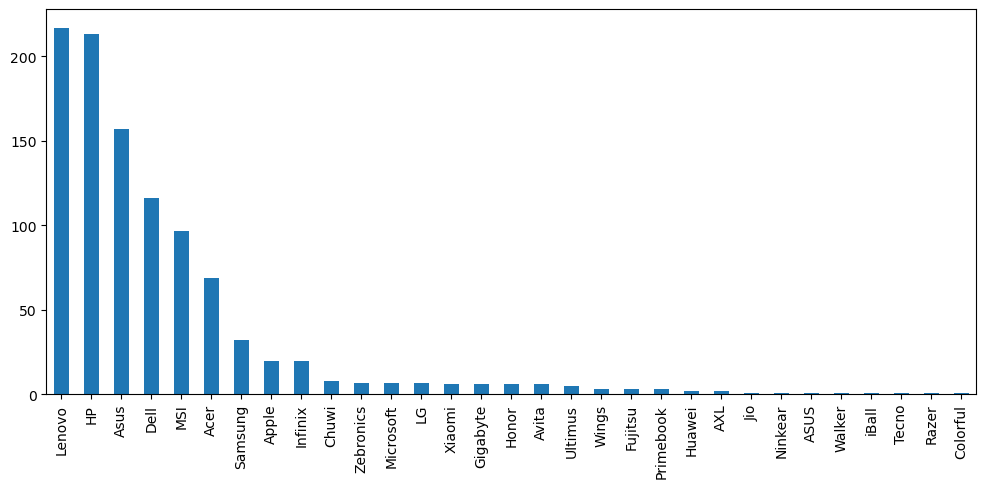

In [83]:
df.Brand.value_counts().plot(kind='bar',figsize=(12,5))

3. Importing Laptop Sales Price Data With Necessary Feature


In [84]:
column=['Rating', 'Core_per_processor', 'RAM_GB', 'Storage_capacity_GB',
       'Graphics_integreted', 'Display_size_inches', 'Horizontal_pixel',
       'Vertical_pixel', 'ppi', 'Touch_screen','Price']

In [85]:
l_df = df[column].copy()

In [86]:
l_df.head()

,Rating,Core_per_processor,RAM_GB,Storage_capacity_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Price
0,4.30,6.0,8,512,False,15.6,1920,1080,141.21,True,50399
1,4.45,4.0,8,512,False,15.6,1920,1080,141.21,False,26690
2,4.65,6.0,8,512,False,15.6,1920,1080,141.21,False,37012
3,4.75,12.0,16,512,False,13.3,1080,1920,165.63,False,69990
4,4.25,2.0,8,512,False,15.6,1920,1080,141.21,False,23990


In [87]:
l_df.dtypes

Rating                 float64
Core_per_processor     float64
RAM_GB                   int64
Storage_capacity_GB      int64
Graphics_integreted     object
Display_size_inches    float64
Horizontal_pixel         int64
Vertical_pixel           int64
ppi                    float64
Touch_screen              bool
Price                    int64
dtype: object

In [88]:
 l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               1020 non-null   float64
 1   Core_per_processor   1008 non-null   float64
 2   RAM_GB               1020 non-null   int64  
 3   Storage_capacity_GB  1020 non-null   int64  
 4   Graphics_integreted  1018 non-null   object 
 5   Display_size_inches  1020 non-null   float64
 6   Horizontal_pixel     1020 non-null   int64  
 7   Vertical_pixel       1020 non-null   int64  
 8   ppi                  990 non-null    float64
 9   Touch_screen         1020 non-null   bool   
 10  Price                1020 non-null   int64  
dtypes: bool(1), float64(4), int64(5), object(1)
memory usage: 80.8+ KB


4. Category


In [89]:
cdf = l_df.select_dtypes(include =['object', 'bool'])
cdf.head()

,Graphics_integreted,Touch_screen
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False


In [90]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Graphics_integreted  1018 non-null   object
 1   Touch_screen         1020 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 9.1+ KB


In [91]:
cdf.isnull().sum()

Graphics_integreted    2
Touch_screen           0
dtype: int64

In [92]:
cdf.nunique()

Graphics_integreted    2
Touch_screen           2
dtype: int64

In [93]:
from sklearn.impute import SimpleImputer

imputeC = SimpleImputer(strategy ='most_frequent')
cdata =imputeC.fit_transform(cdf)

In [94]:
Catedf = pd.DataFrame(cdata, columns = cdf.columns)
Catedf.isna().sum()

Graphics_integreted    0
Touch_screen           0
dtype: int64

In [95]:
Catedf.shape

(1020, 2)

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
result1 = le.fit_transform(Catedf['Graphics_integreted'])
result2 = le.fit_transform(Catedf['Touch_screen'])

In [97]:

Catedf['Graphics_integreted'] = pd.DataFrame(result1, columns = ['Graphics_integreted'])
Catedf['Touch_screen'] = pd.DataFrame(result2, columns = ['Touch_screen'])

Catedf.head()

,Graphics_integreted,Touch_screen
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


Numerical Features

In [98]:
ndf = l_df.select_dtypes(include = ['float', 'int'])
ndf.head()

,Rating,Core_per_processor,RAM_GB,Storage_capacity_GB,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Price
0,4.30,6.0,8,512,15.6,1920,1080,141.21,50399
1,4.45,4.0,8,512,15.6,1920,1080,141.21,26690
2,4.65,6.0,8,512,15.6,1920,1080,141.21,37012
3,4.75,12.0,16,512,13.3,1080,1920,165.63,69990
4,4.25,2.0,8,512,15.6,1920,1080,141.21,23990


In [99]:
ndf.isnull().sum()

Rating                  0
Core_per_processor     12
RAM_GB                  0
Storage_capacity_GB     0
Display_size_inches     0
Horizontal_pixel        0
Vertical_pixel          0
ppi                    30
Price                   0
dtype: int64

In [100]:
imputer = SimpleImputer(strategy='mean')
column_to_impute = ndf[['Core_per_processor']]
imputed_column = imputer.fit_transform(column_to_impute)
ndf['Core_per_processor'] = imputed_column
ndf.isnull().sum()

Rating                  0
Core_per_processor      0
RAM_GB                  0
Storage_capacity_GB     0
Display_size_inches     0
Horizontal_pixel        0
Vertical_pixel          0
ppi                    30
Price                   0
dtype: int64

Using LR to fill the missing values

In [101]:
df_present = ndf[ndf['ppi'].notnull()].copy()
df_null = ndf[ndf['ppi'].isnull()].copy()

In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_missing = df_null  # Subset with missing values
X_train = df_present[['Display_size_inches', 'Horizontal_pixel', 'Vertical_pixel']]
y_train = df_present['ppi']

# Training a regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [103]:
y_train_predicted = model.predict(X_train)
X_missing = df_null[['Display_size_inches', 'Horizontal_pixel', 'Vertical_pixel']]


In [104]:
predicted_ppi = model.predict(X_missing)
predicted_ppi

array([140.57858252, 241.39195556, 140.57858252, 140.57858252,
       220.64986835, 146.13290646, 170.04407627, 141.7828826 ,
       135.14105269, 135.14105269, 140.57858252, 140.57858252,
       140.57858252, 140.57858252, 140.57858252, 141.7828826 ,
       157.97867797, 140.57858252, 170.0580377 , 165.59121973,
       140.57858252, 140.57858252, 157.97867797, 140.57858252,
       140.57858252, 141.7828826 , 161.65755677, 163.53300191,
       140.57858252, 140.57858252])

In [105]:
mse_train = mean_squared_error(y_train, y_train_predicted)
print("Mean Squared Error (MSE) for training data:", mse_train)

Mean Squared Error (MSE) for training data: 7.424535319672763


In [106]:
df_null['ppi'] = predicted_ppi

In [107]:
df_null.isnull().sum()

Rating                 0
Core_per_processor     0
RAM_GB                 0
Storage_capacity_GB    0
Display_size_inches    0
Horizontal_pixel       0
Vertical_pixel         0
ppi                    0
Price                  0
dtype: int64

In [108]:
ndf = pd.concat([df_null, df_present], ignore_index=True)

In [109]:
ndf.isnull().sum()

Rating                 0
Core_per_processor     0
RAM_GB                 0
Storage_capacity_GB    0
Display_size_inches    0
Horizontal_pixel       0
Vertical_pixel         0
ppi                    0
Price                  0
dtype: int64

In [110]:
ndf

,Rating,Core_per_processor,RAM_GB,Storage_capacity_GB,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Price
0,4.10,6.0,8,512,15.6,1920,1080,140.578583,36940
1,4.70,14.0,16,1000,16.0,3200,2000,241.391956,149990
2,4.45,2.0,8,512,15.6,1920,1080,140.578583,35500
3,4.50,8.0,16,512,15.6,1920,1080,140.578583,53490
4,4.20,8.0,8,512,13.6,2560,1664,220.649868,119900
...,...,...,...,...,...,...,...,...,...
1015,4.45,14.0,32,1000,17.0,2560,1600,177.580000,247999
1016,4.20,14.0,32,1000,16.0,3840,2400,283.020000,292990
1017,4.40,6.0,8,512,15.6,1920,1080,141.210000,58800
1018,4.25,6.0,8,512,16.0,1920,1200,141.510000,54999


Outlier Detection

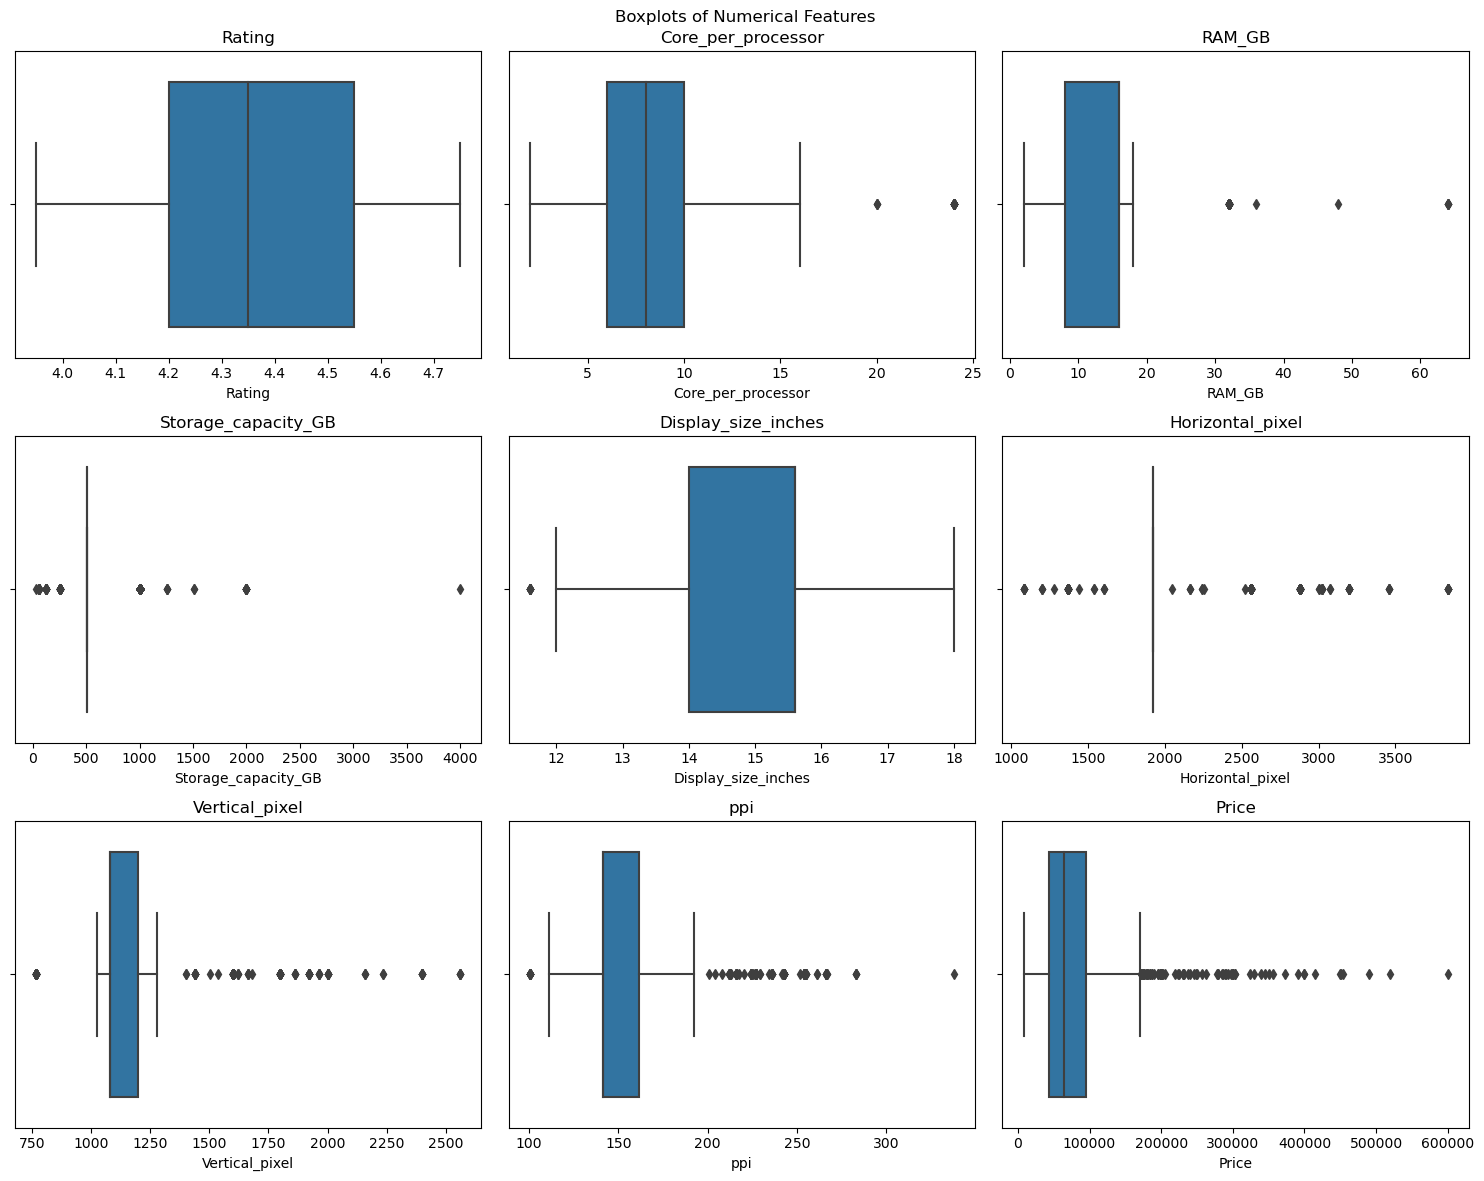

In [111]:
def create_boxplots(data):
  numerical_features = ndf.columns
  data_to_plot = data[numerical_features]

  fig, axes = plt.subplots(3, 3, figsize=(15, 12))

  for i, feature in enumerate(numerical_features):
    row = int(i / 3)
    col = i % 3
    sns.boxplot(ax=axes[row, col], data=data_to_plot, x=feature)
    axes[row, col].set_title(feature)

  fig.suptitle('Boxplots of Numerical Features')
  fig.tight_layout()
  plt.show()

create_boxplots(ndf)

Removing Outliers

In [112]:
# def remove_iqr_outliers(data, features):
#   filtered_data = data.copy()
#   for feature in features:
#     Q1 = data[feature].quantile(0.25)
#     Q3 = data[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     lowerlimit = Q1 - (IQR * 1.5)
#     upperlimit = Q3 + (IQR * 1.5)
#     filtered_data = filtered_data[(filtered_data[feature] > lowerlimit) & (filtered_data[feature] < upperlimit)]
  
#   return filtered_data
# #
# features_to_clean = ndf.columns

# cleaned_data = remove_iqr_outliers(ndf.copy(), features_to_clean)

# print("DataFrame before removing outliers: ", ndf.shape)
# print("DataFrame after removing outliers: ", cleaned_data.shape)

Checking the Feature Distribution

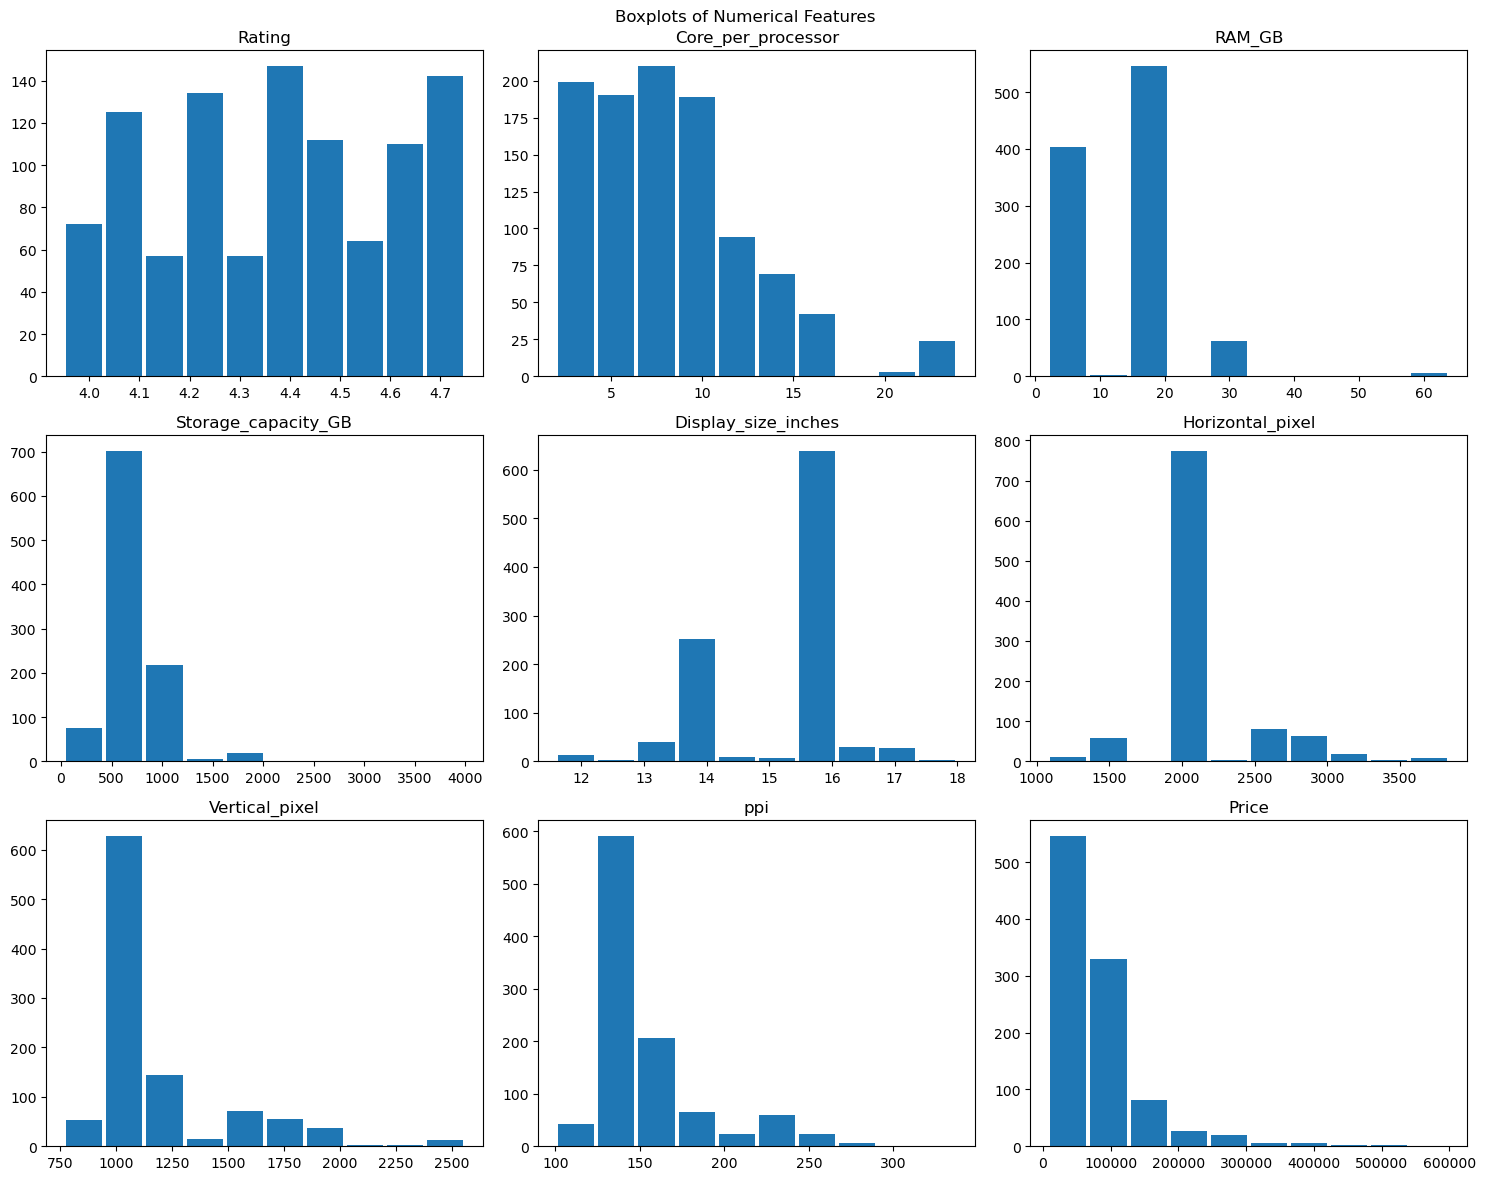

In [113]:
def create_boxplots(data):
    numerical_features = ndf.columns
    data_to_plot = data[numerical_features]

    fig, axes = plt.subplots(3, 3, figsize=(15, 12))

    for i, feature in enumerate(numerical_features):
        row = int(i / 3)
        col = i % 3
        axes[row, col].hist(data_to_plot[feature], rwidth=0.9)
        axes[row, col].set_title(feature)

    fig.suptitle('Boxplots of Numerical Features')
    plt.tight_layout()
    plt.show()

create_boxplots(ndf)


Feature Scaling

In [114]:
cool_df = pd.concat([Catedf, ndf.drop('Price', axis=1)], axis=1)
cool_df.head()

,Graphics_integreted,Touch_screen,Rating,Core_per_processor,RAM_GB,Storage_capacity_GB,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi
0,0,1,4.10,6.0,8,512,15.6,1920,1080,140.578583
1,0,0,4.70,14.0,16,1000,16.0,3200,2000,241.391956
2,0,0,4.45,2.0,8,512,15.6,1920,1080,140.578583
3,0,0,4.50,8.0,16,512,15.6,1920,1080,140.578583
4,0,0,4.20,8.0,8,512,13.6,2560,1664,220.649868


In [115]:
cool_df.shape

(1020, 10)

In [116]:
ndf[["Price"]].shape

(1020, 1)

In [117]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

scaler_standard = StandardScaler()

scaled_data_standard = scaler_standard.fit_transform(cool_df)

scaler_minmax = MinMaxScaler()

scaled_data_minmax = scaler_minmax.fit_transform(cool_df)

scaler_robust = RobustScaler()

scaled_data_robust = scaler_robust.fit_transform(cool_df)

scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=cool_df.columns)

scaled_df_minmax = pd.DataFrame(scaled_data_minmax, columns=cool_df.columns)

scaled_df_robust = pd.DataFrame(scaled_data_robust, columns=cool_df.columns)

In [118]:
print("StandardScaler:")
scaled_df_standard.head()


StandardScaler:


,Graphics_integreted,Touch_screen,Rating,Core_per_processor,RAM_GB,Storage_capacity_GB,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi
0,-0.563764,2.791613,-1.173667,-0.591763,-0.833861,-0.365370,0.435770,-0.282421,-0.436955,-0.494160
1,-0.563764,-0.358216,1.399445,1.248568,0.279409,1.175246,0.835352,2.847097,2.562595,2.507872
2,-0.563764,-0.358216,0.327315,-1.511929,-0.833861,-0.365370,0.435770,-0.282421,-0.436955,-0.494160
3,-0.563764,-0.358216,0.541741,-0.131680,0.279409,-0.365370,0.435770,-0.282421,-0.436955,-0.494160
4,-0.563764,-0.358216,-0.744815,-0.131680,-0.833861,-0.365370,-1.562141,1.282338,1.467107,1.890212


In [119]:
print("\nMinMaxScaler:")
scaled_df_minmax.head()


MinMaxScaler:


,Graphics_integreted,Touch_screen,Rating,Core_per_processor,RAM_GB,Storage_capacity_GB,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi
0,0.0,1.0,0.1875,0.181818,0.096774,0.120968,0.6250,0.304348,0.174107,0.168977
1,0.0,0.0,0.9375,0.545455,0.225806,0.243952,0.6875,0.768116,0.687500,0.593490
2,0.0,0.0,0.6250,0.000000,0.096774,0.120968,0.6250,0.304348,0.174107,0.168977
3,0.0,0.0,0.6875,0.272727,0.225806,0.120968,0.6250,0.304348,0.174107,0.168977
4,0.0,0.0,0.3125,0.272727,0.096774,0.120968,0.3125,0.536232,0.500000,0.506147


In [120]:
print("scaled_df_robust:")
scaled_df_robust.head(10)

scaled_df_robust:


,Graphics_integreted,Touch_screen,Rating,Core_per_processor,RAM_GB,Storage_capacity_GB,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi
0,0.0,1.0,-0.714286,-0.5,-1.0,0.0,0.0000,0.0,0.000000,-0.030771
1,0.0,0.0,1.000000,1.5,0.0,488.0,0.2500,1280.0,7.666667,4.882162
2,0.0,0.0,0.285714,-1.5,-1.0,0.0,0.0000,0.0,0.000000,-0.030771
3,0.0,0.0,0.428571,0.0,0.0,0.0,0.0000,0.0,0.000000,-0.030771
4,0.0,0.0,-0.428571,0.0,-1.0,0.0,-1.2500,640.0,4.866667,3.871339
5,1.0,0.0,-0.428571,-0.5,0.0,0.0,0.0000,0.0,1.000000,0.239908
6,0.0,0.0,0.142857,2.0,2.0,1488.0,1.0625,640.0,3.000000,1.405169
7,0.0,0.0,0.285714,-0.5,0.0,0.0,0.2500,0.0,1.000000,0.027918
8,1.0,0.0,0.000000,0.0,0.0,488.0,0.3125,0.0,0.000000,-0.295758
9,0.0,0.0,0.428571,0.0,0.0,488.0,0.3125,0.0,0.000000,-0.295758


Feature Distribution After Feature Scaling

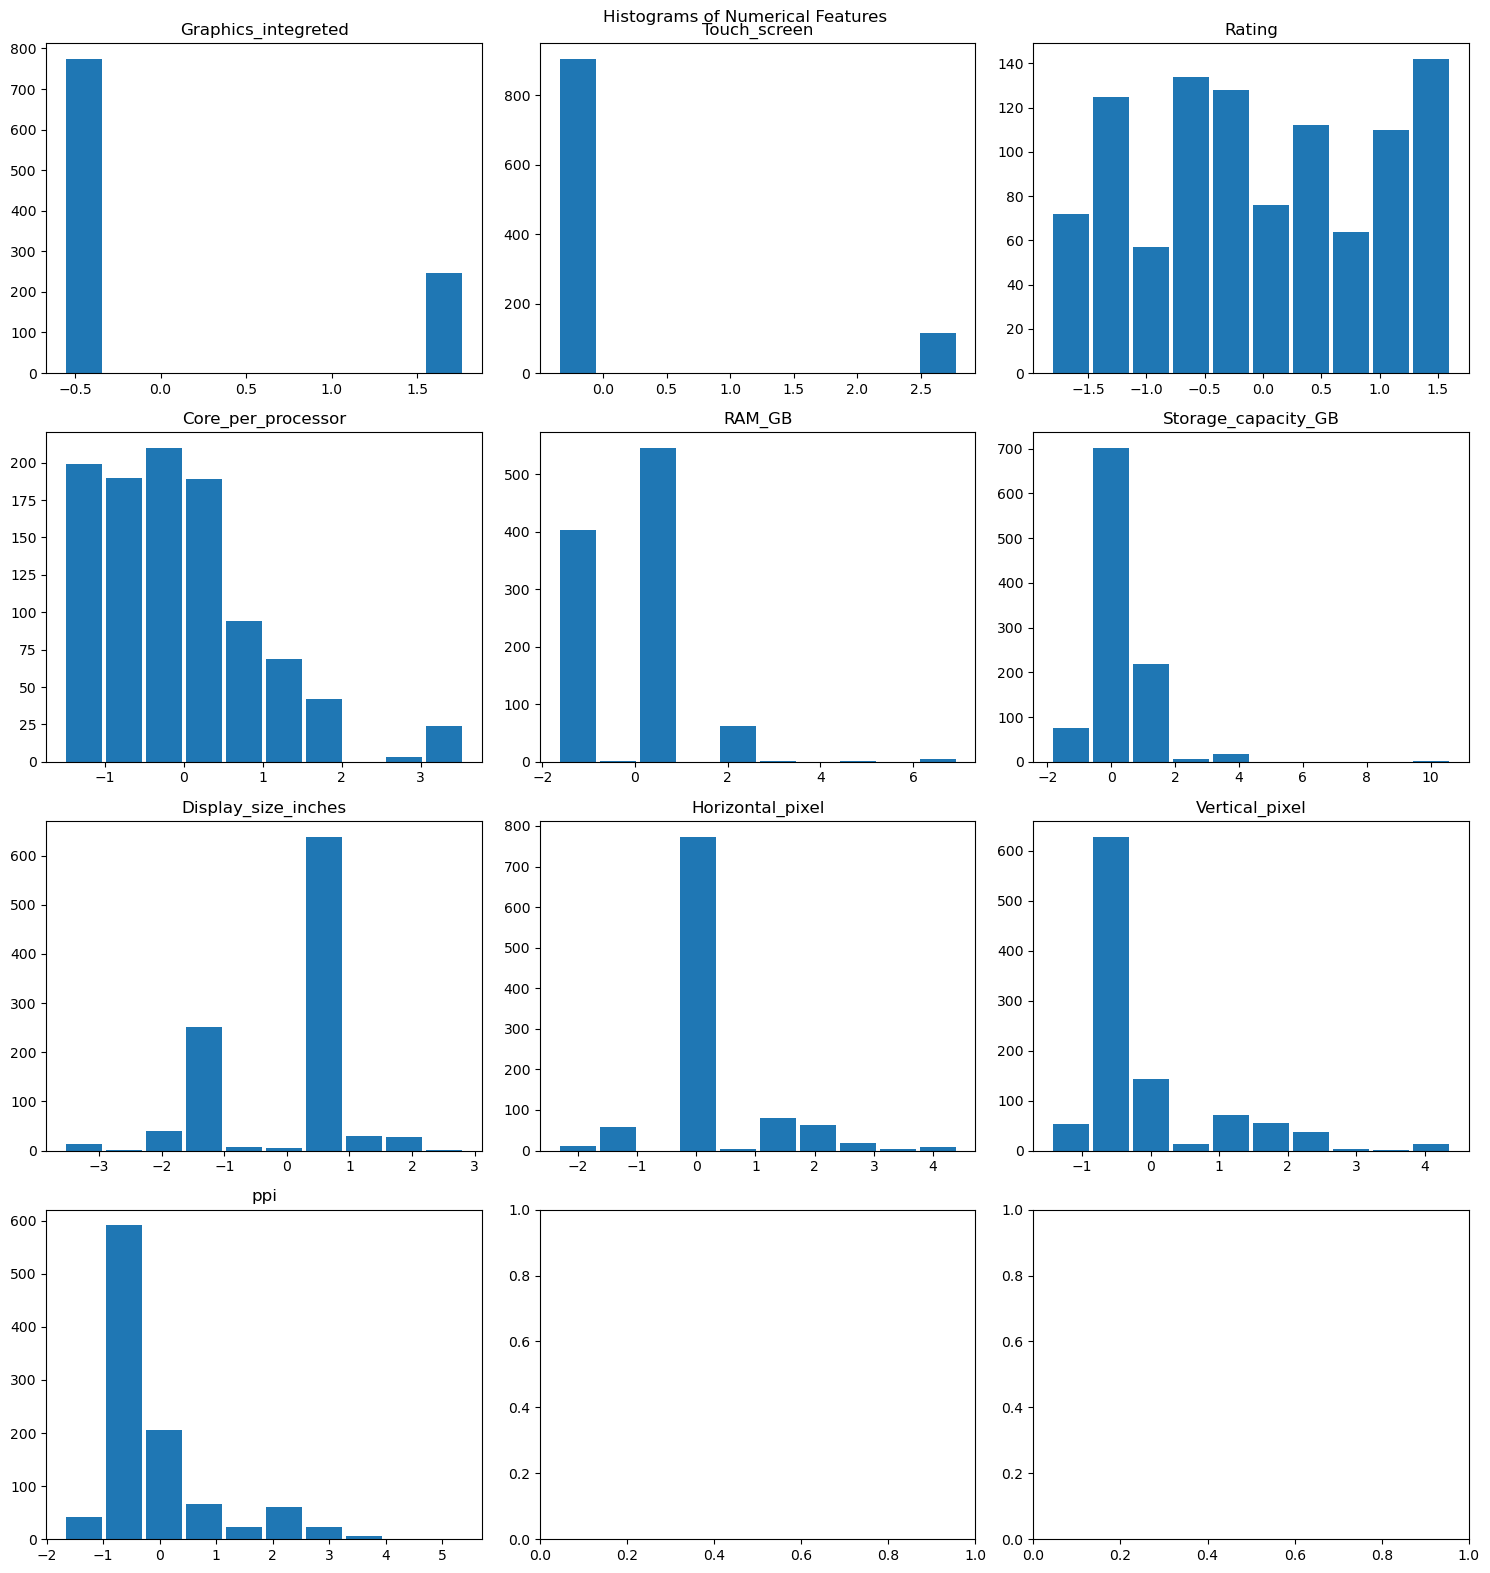

In [121]:
import matplotlib.pyplot as plt

def create_boxplots(data):
    numerical_features = data.columns  # Get all columns from the DataFrame
    num_cols = len(numerical_features)
    num_rows = num_cols // 3 + (1 if num_cols % 3 > 0 else 0)  # Calculate number of rows needed for subplot

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))

    for i, feature in enumerate(numerical_features):
        row = i // 3
        col = i % 3
        axes[row, col].hist(data[feature], rwidth=0.9)
        axes[row, col].set_title(feature)

    fig.suptitle('Histograms of Numerical Features')
    plt.tight_layout()
    plt.show()

create_boxplots(scaled_df_standard)


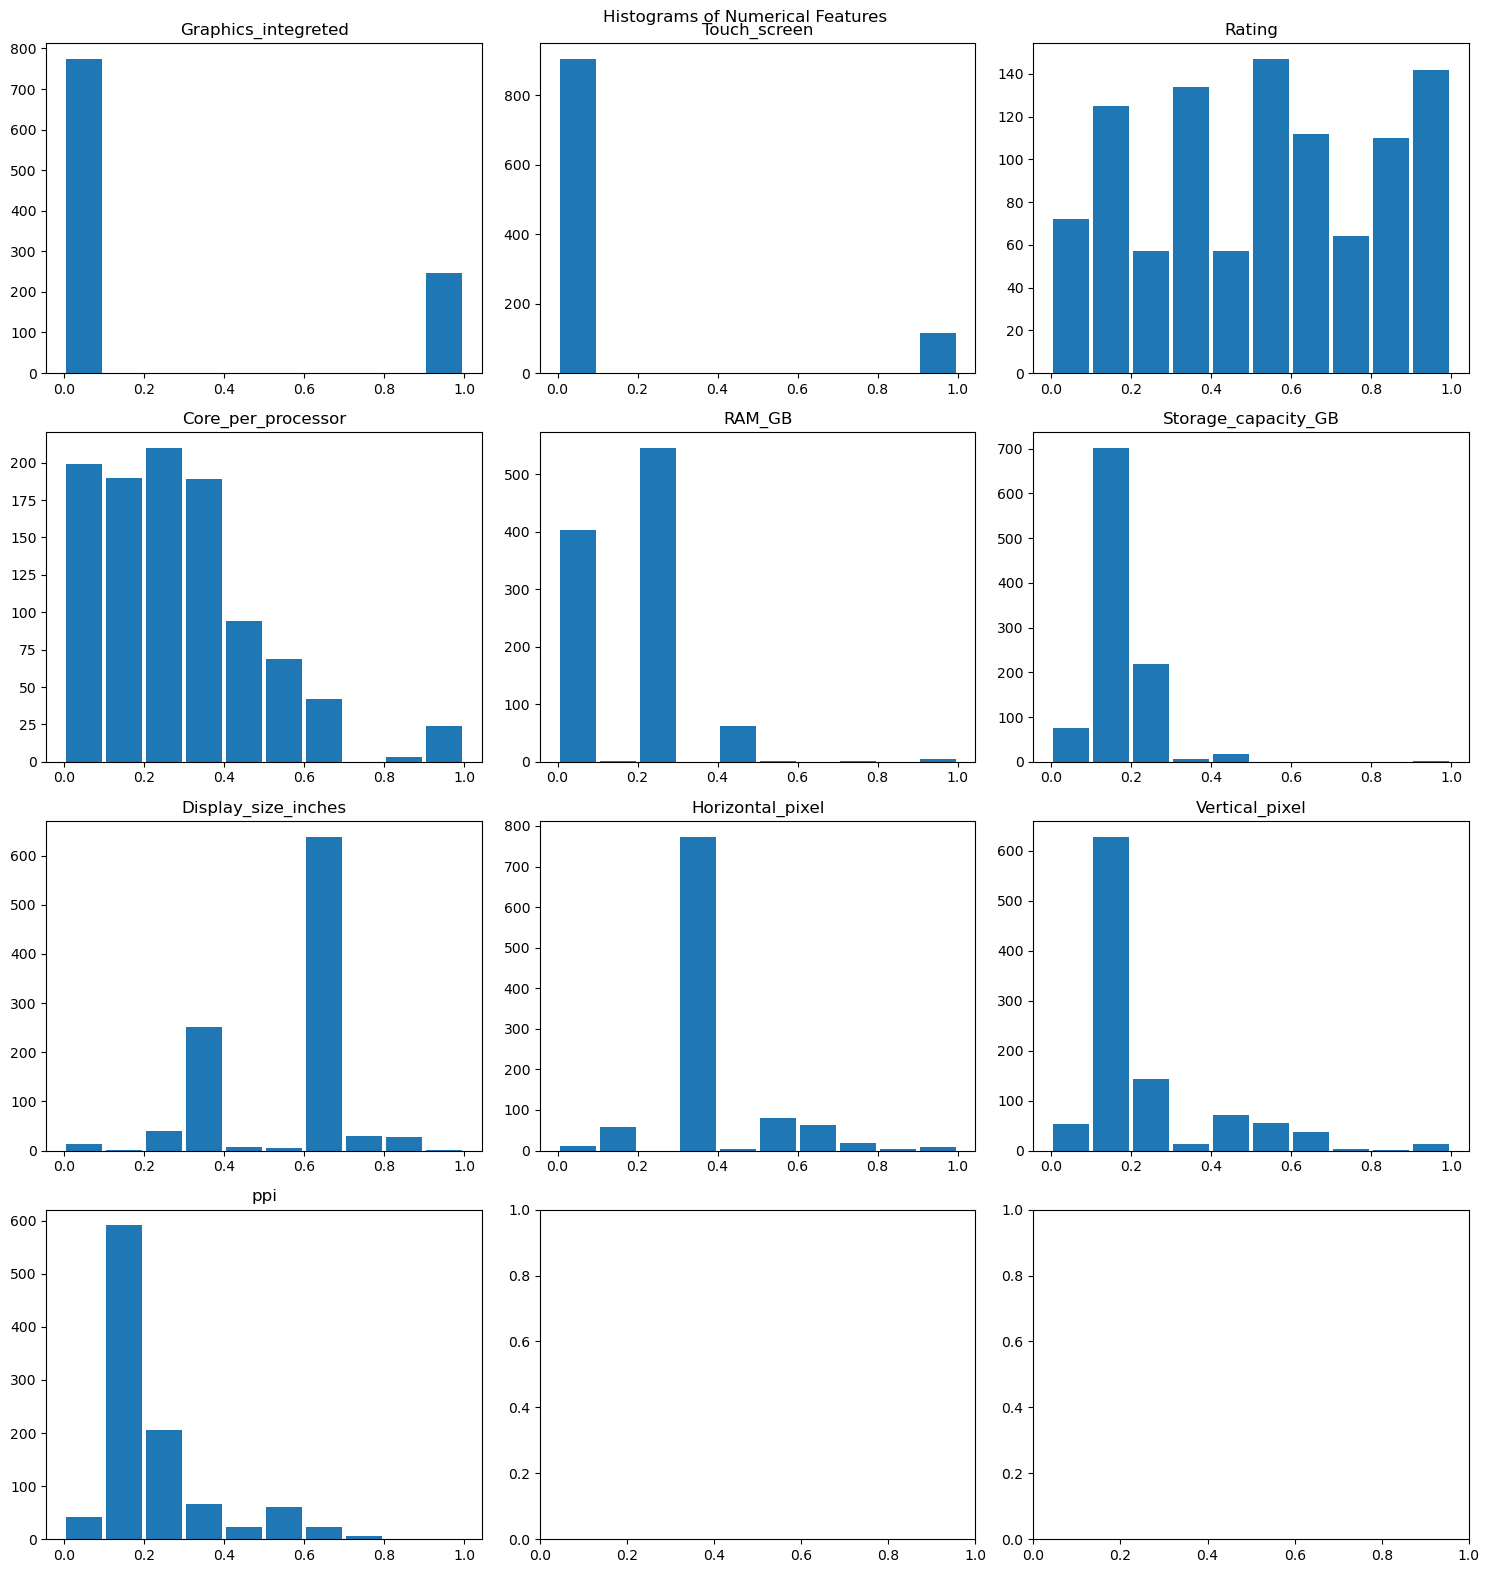

In [122]:
def create_boxplots(data):
    numerical_features = data.columns  # Get all columns from the DataFrame
    num_cols = len(numerical_features)
    num_rows = num_cols // 3 + (1 if num_cols % 3 > 0 else 0)  # Calculate number of rows needed for subplot

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))

    for i, feature in enumerate(numerical_features):
        row = i // 3
        col = i % 3
        axes[row, col].hist(data[feature], rwidth=0.9)
        axes[row, col].set_title(feature)

    fig.suptitle('Histograms of Numerical Features')
    plt.tight_layout()
    plt.show()
create_boxplots(scaled_df_minmax)

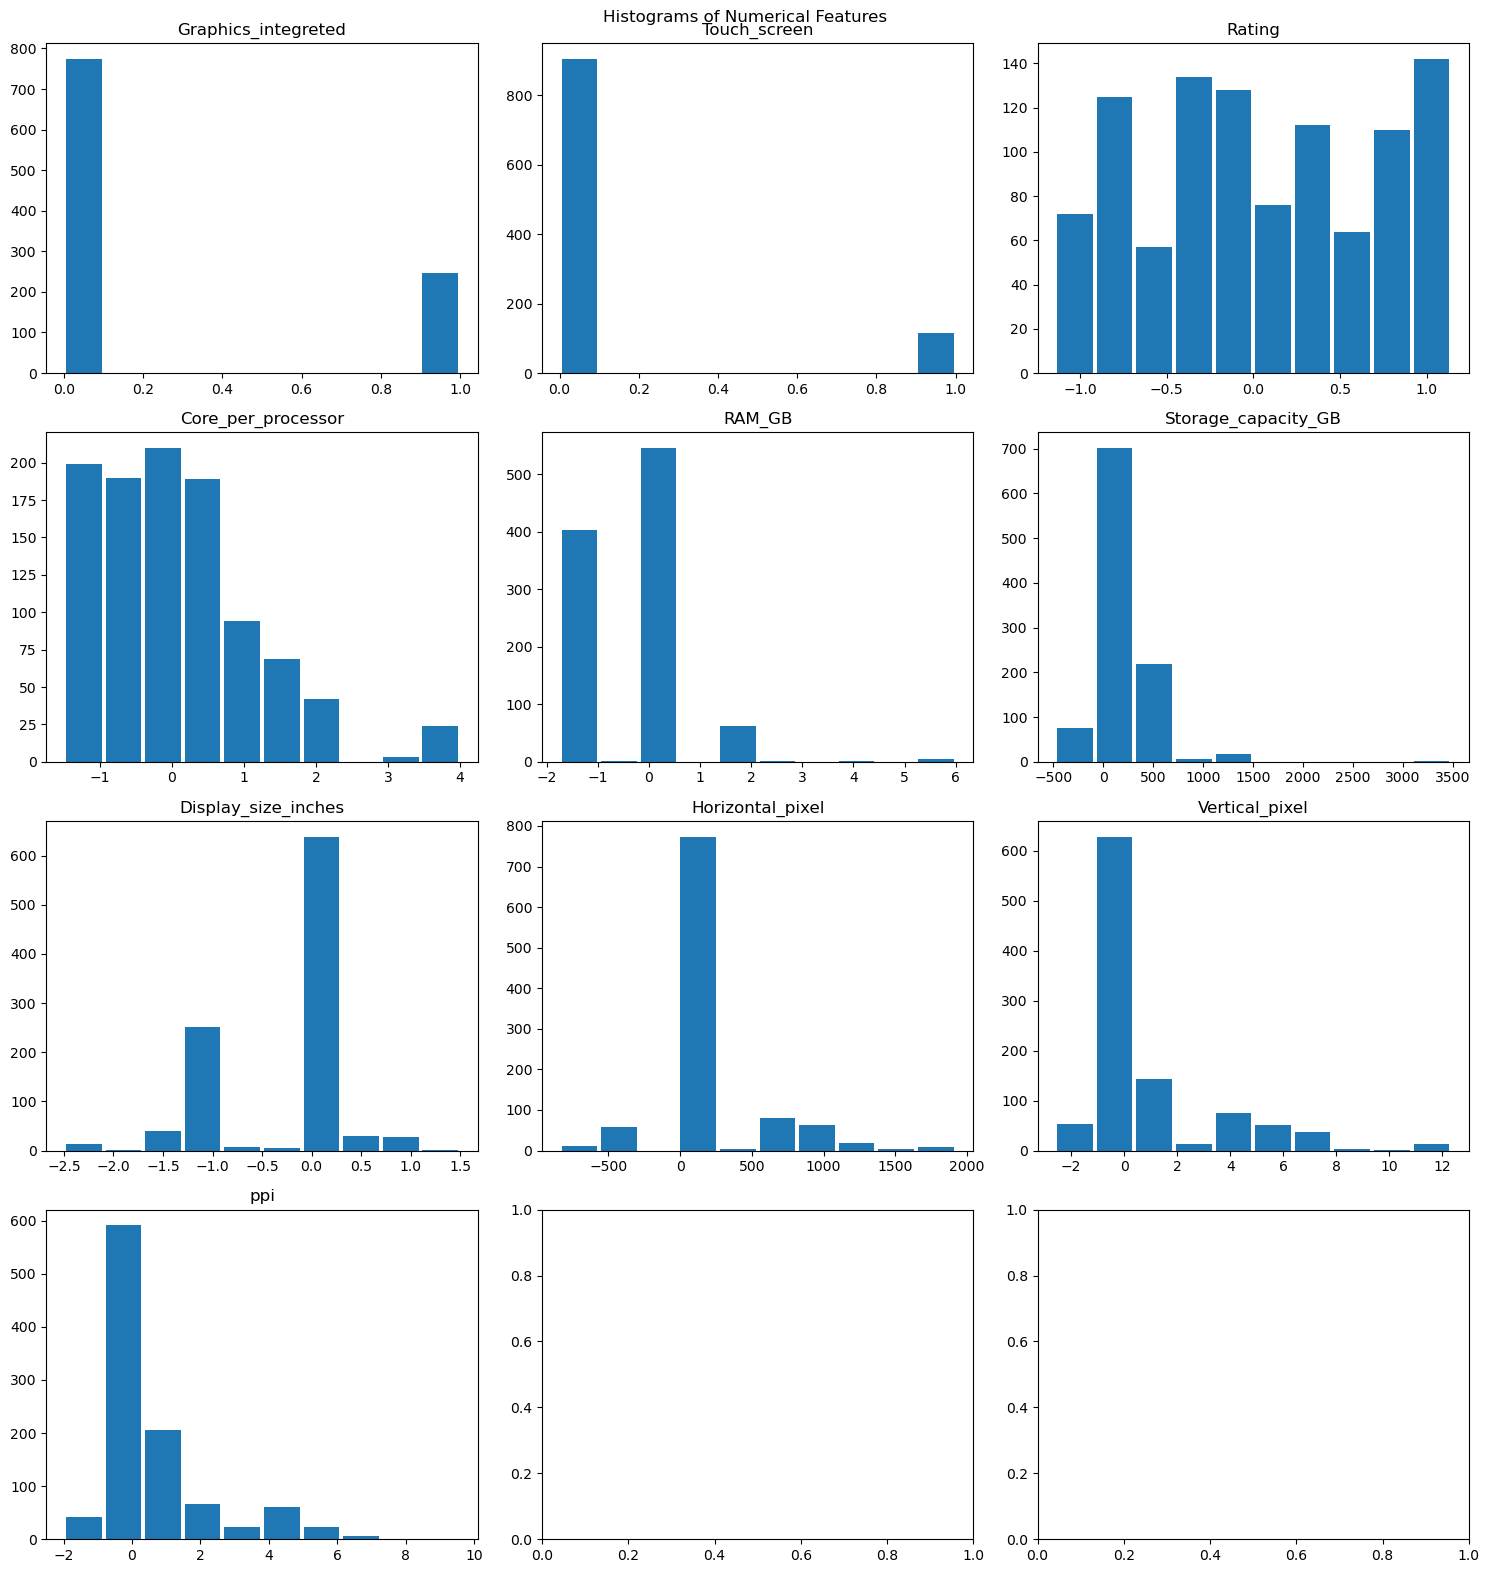

In [123]:
def create_boxplots(data):
    numerical_features = data.columns  # Get all columns from the DataFrame
    num_cols = len(numerical_features)
    num_rows = num_cols // 3 + (1 if num_cols % 3 > 0 else 0)  # Calculate number of rows needed for subplot

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 4 * num_rows))

    for i, feature in enumerate(numerical_features):
        row = i // 3
        col = i % 3
        axes[row, col].hist(data[feature], rwidth=0.9)
        axes[row, col].set_title(feature)

    fig.suptitle('Histograms of Numerical Features')
    plt.tight_layout()
    plt.show()
create_boxplots(scaled_df_robust)

Exploring Relationship Between Input Variable and Target Variable Through Scatter Plot

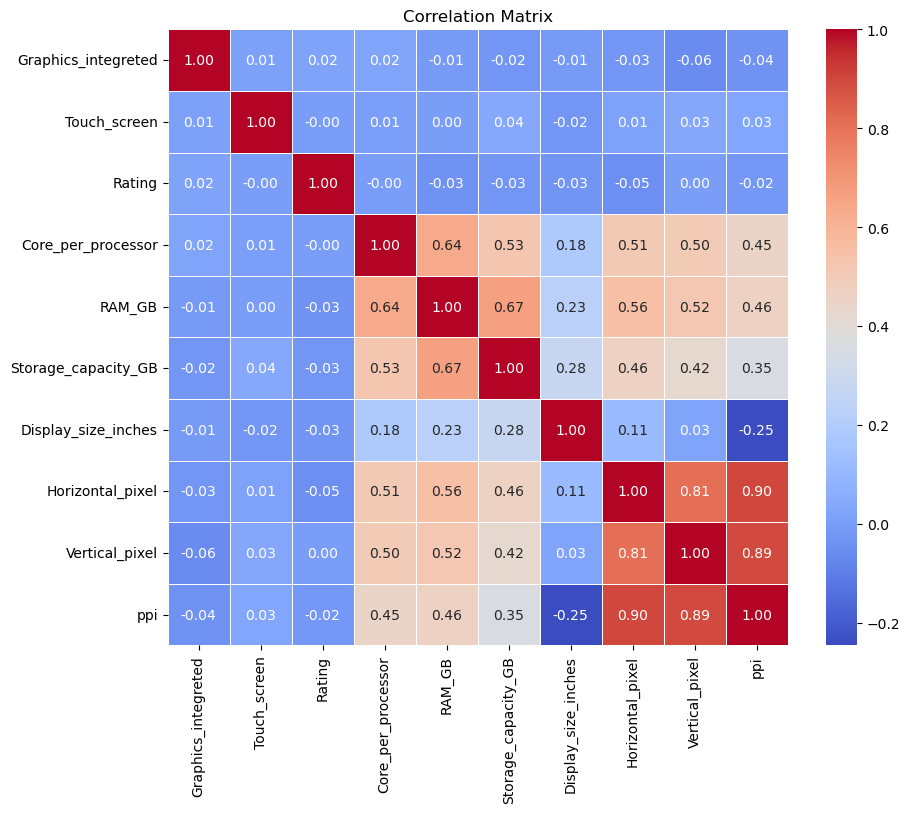

In [124]:
import seaborn as sns

correlation_matrix = cool_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Combining the two DataFrame

In [127]:
ndf.shape

(1020, 9)

In [129]:
scaled_df_standard.columns

Index(['Graphics_integreted', 'Touch_screen', 'Rating', 'Core_per_processor',
       'RAM_GB', 'Storage_capacity_GB', 'Display_size_inches',
       'Horizontal_pixel', 'Vertical_pixel', 'ppi'],
      dtype='object')

Initiating Machine Learning: Data Fitting and Model Training for Predictive Analysis

In [141]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import SGDRegressor

def evaluate_regression_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2 ,

def main(x_train, y_train, x_test, y_test):
    # Instantiate models
    lr = LinearRegression()
    dt_regressor = DecisionTreeRegressor()
    knn_regressor = KNeighborsRegressor()
    svm_regressor = SVR()
    sgd_regressor = SGDRegressor()

    # Evaluate models
    models = {'Linear Regression': lr, 'Decision Tree Regression': dt_regressor, 
              'K-Nearest Neighbors Regression': knn_regressor, 'Support Vector Machine Regression': svm_regressor,
              'SGD Regressor': sgd_regressor}

    for name, model in models.items():
        rmse, mae, r2 = evaluate_regression_model(model, x_train, y_train, x_test, y_test)
        print(f"{name} Accuracy:")
        print(f"Root Mean Squared Error: {rmse}")
        print(f"Mean Absolute Error: {mae}")
        print(f"R^2 Score: {r2}")
        print()

if __name__ == "__main__":
    # Example usage with different scaled data
    # Using StandardScaler
    y = ndf['Price']
    x = scaled_df_standard
    print("StandardScaler:")
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    main(x_train, y_train, x_test, y_test)
    
    # Using MinMaxScaler
    Y = ndf['Price']
    X = scaled_df_minmax
    print("MinMaxScaler:")
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    main(X_train, Y_train, X_test, Y_test)
    

    yY = ndf['Price']
    xX = scaled_df_robust
    xX_train, xX_test, yY_train, yY_test = train_test_split(xX, yY, test_size=0.25, random_state=42)
    
    print("RobustScaler:")
    main(xX_train, yY_train, xX_test, yY_test)
   

StandardScaler:
Linear Regression Accuracy:
Root Mean Squared Error: 28905.059767894414
Mean Absolute Error: 17977.509800016916
R^2 Score: 0.7771523035970274

Decision Tree Regression Accuracy:
Root Mean Squared Error: 40051.87801914008
Mean Absolute Error: 21347.55555555556
R^2 Score: 0.5721355779978643

K-Nearest Neighbors Regression Accuracy:
Root Mean Squared Error: 32430.3690709586
Mean Absolute Error: 19165.20705882353
R^2 Score: 0.7194797689237997

Support Vector Machine Regression Accuracy:
Root Mean Squared Error: 61747.84813037754
Mean Absolute Error: 35316.934111158975
R^2 Score: -0.016960442916952756

SGD Regressor Accuracy:
Root Mean Squared Error: 31837.519852506895
Mean Absolute Error: 19086.726462061517
R^2 Score: 0.7296422252395955

MinMaxScaler:
Linear Regression Accuracy:
Root Mean Squared Error: 28905.059767894414
Mean Absolute Error: 17977.509800016913
R^2 Score: 0.7771523035970274

Decision Tree Regression Accuracy:
Root Mean Squared Error: 38293.46672835671
Mean 

Selecting SGD Regressor From StandardScaler for Hyperparameter

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()

linear_regressor.fit(x_train, y_train)

y_pred_linear = linear_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linear)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R^2):", r2)

Mean Squared Error (MSE): 835502480.1855483
Root Mean Squared Error (RMSE): 28905.059767894414
R-squared Score (R^2): 0.7771523035970274


In [152]:
ndf["Price"].describe()

count      1020.000000
mean      82063.474510
std       66502.150607
min        8000.000000
25%       43990.000000
50%       63689.500000
75%       94990.000000
max      599990.000000
Name: Price, dtype: float64

Comparing Actual and Predicted Values: Creating a DataFrame for Analysis

In [143]:
pd.DataFrame({'actual':y_test,'prediction':y_pred_linear})

,actual,prediction
523,159990,204346.099572
602,129990,89389.344298
526,42990,35473.841482
31,26690,35866.502237
616,32990,33395.100573
...,...,...
817,35990,32098.499898
370,224990,160121.028144
921,51499,65503.657640
249,53990,40780.996130


Based on the provided regression model accuracies:

 
The Linear Regression model(StandardScaler) performs similarly to SGD Regressor (StandardScaler) with an RMSE of 28905 and an R^2 score of upto 0.7771 , showing good explanatory power and prediction accuracy.
In conclusion, among the models evaluated, Linear Regression and SGD Regression demonstrate the best performance in terms of both RMSE and R^2 score. These models can be preferred for predicting the target variable in this scenario.



# conclusion,
among the models evaluated, Linear Regression and SGD Regression demonstrate the best performance in terms of both RMSE and R^2 score. These models can be preferred for predicting the target variable in this scenario.






